In [79]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [80]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [81]:
df.sample(5)

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
6456  9174-IHETN  Female              0      No        Yes      50   
1744  8952-WCVCD  Female              0     Yes         No      41   
2214  8337-MSSXB  Female              0      No         No      14   
4597  3440-JPSCL  Female              0      No         No       6   
1778  6181-AXXYF    Male              0     Yes        Yes      72   

     PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
6456          Yes            No     Fiber optic                   No  ...   
1744          Yes            No     Fiber optic                  Yes  ...   
2214          Yes            No     Fiber optic                   No  ...   
4597          Yes            No     Fiber optic                   No  ...   
1778          Yes           Yes              No  No internet service  ...   

         DeviceProtection          TechSupport          StreamingTV  \
6456                   No                   No                   No   
1744                  Yes                   No                  Yes   
2214                   No                   No                   No   
4597                  Yes                  Yes                  Yes   
1778  No internet service  No internet service  No internet service   

          StreamingMovies        Contract PaperlessBilling  \
6456                   No        Two year               No   
1744                  Yes        One year              Yes   
2214                  Yes  Month-to-month              Yes   
4597                  Yes  Month-to-month              Yes   
1778  No internet service        Two year               No   

                  PaymentMethod MonthlyCharges  TotalCharges Churn  
6456    Credit card (automatic)          70.35        3533.6    No  
1744  Bank transfer (automatic)         104.45       4162.05    No  
2214           Electronic check          86.30       1180.95   Yes  
4597               Mailed check          99.95        547.65   Yes  
1778    Credit card (automatic)          24.75        1859.1    No  

[5 rows x 21 columns]

In [82]:
df.drop('customerID', axis='columns', inplace=True)

In [83]:
df.dtypes
# df.head(5)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [84]:
df.TotalCharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [85]:
df.MonthlyCharges

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7043, dtype: float64

In [86]:
#Checking how many values in totalcharges are empty
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [87]:
#Showing all the rows which have null values
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges Churn  
488   Bank transfer (automatic)           52.55                 No  
753                Mailed check           20.25                 No  
936                Mailed check           80.85                 No  
1082               Mailed check           25.75                 No  
1340    Credit card (automatic)           56.05                 No  
3331               Mailed check           19.85                 No  
3826               Mailed check           25.35                 No  
4380               Mailed check           20.00                 No

In [88]:
#Droping all the 11 columns
df1 = df[df.TotalCharges != ' ']
df.shape

(7043, 20)

In [89]:
#Converting to numeric values
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

/tmp/ipykernel_15391/2907953658.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [90]:
#Naw we can see that we have a totalcharges is naw float value
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

We are going to make some visualization based on tenure

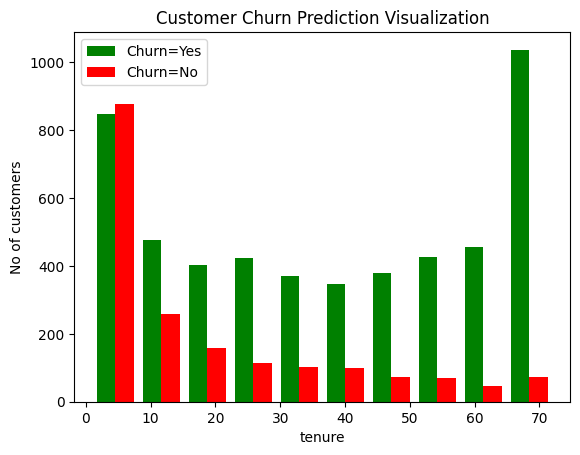

In [91]:
tenure_crunch_no = df1[df1.Churn=='No'].tenure
tenure_crunch_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("No of customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([tenure_crunch_no, tenure_crunch_yes],  color=['green','red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

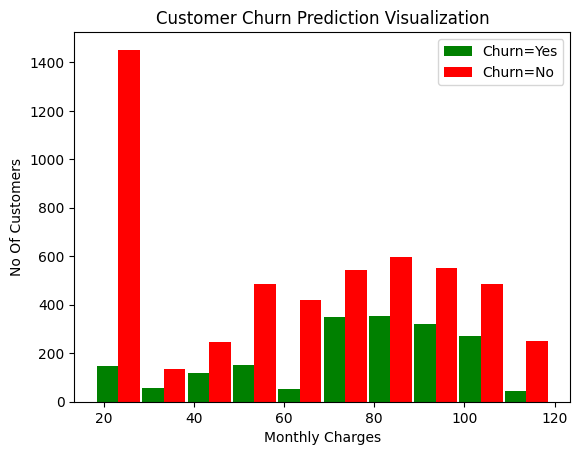

In [92]:
mc_crunch_no = df1[df1.Churn=='No'].MonthlyCharges
mc_crunch_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("No Of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([mc_crunch_yes, mc_crunch_no], rwidth=0.95, color=['green','red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

In [93]:
#Creating a function for printing unique values from the dataset
def print_unique_values(df):
    for column in df:
        if df[column].dtype=='object': 
            print(f' {column} : {df[column].unique()}')

In [94]:
print_unique_values(df1)

 gender : ['Female' 'Male']
 Partner : ['Yes' 'No']
 Dependents : ['No' 'Yes']
 PhoneService : ['No' 'Yes']
 MultipleLines : ['No phone service' 'No' 'Yes']
 InternetService : ['DSL' 'Fiber optic' 'No']
 OnlineSecurity : ['No' 'Yes' 'No internet service']
 OnlineBackup : ['Yes' 'No' 'No internet service']
 DeviceProtection : ['No' 'Yes' 'No internet service']
 TechSupport : ['No' 'Yes' 'No internet service']
 StreamingTV : ['No' 'Yes' 'No internet service']
 StreamingMovies : ['No' 'Yes' 'No internet service']
 Contract : ['Month-to-month' 'One year' 'Two year']
 PaperlessBilling : ['Yes' 'No']
 PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
 Churn : ['No' 'Yes']


In [95]:
yes_no_col = ['Partner','Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
              'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']


In [96]:
#Replacing all the columns with no internet service with no 
df1[yes_no_col] = df1[yes_no_col].replace('No internet service', 'No')

/tmp/ipykernel_15391/685597512.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[yes_no_col] = df1[yes_no_col].replace('No internet service', 'No')


In [97]:
df1.replace('No phone service','No',inplace=True)

/tmp/ipykernel_15391/628100714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [98]:
print_unique_values(df1)

 gender : ['Female' 'Male']
 Partner : ['Yes' 'No']
 Dependents : ['No' 'Yes']
 PhoneService : ['No' 'Yes']
 MultipleLines : ['No' 'Yes']
 InternetService : ['DSL' 'Fiber optic' 'No']
 OnlineSecurity : ['No' 'Yes']
 OnlineBackup : ['Yes' 'No']
 DeviceProtection : ['No' 'Yes']
 TechSupport : ['No' 'Yes']
 StreamingTV : ['No' 'Yes']
 StreamingMovies : ['No' 'Yes']
 Contract : ['Month-to-month' 'One year' 'Two year']
 PaperlessBilling : ['Yes' 'No']
 PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
 Churn : ['No' 'Yes']


In [99]:
yes_no_col = ['Partner','Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
              'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in yes_no_col:
    df1[col].replace({'Yes': 1, 'No': 0},inplace=True)    

/tmp/ipykernel_15391/4167585875.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes': 1, 'No': 0},inplace=True)
/tmp/ipykernel_15391/4167585875.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].replace({'Yes': 1, 'No': 0},inplace=True)
/tmp/ipykernel_15391/416758587

In [100]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]
